In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
cancer=pd.read_csv("/content/data.csv")

In [ ]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
cancer.shape

(569, 32)

In [ ]:
cancer.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [ ]:
diagnosis_unique=cancer.diagnosis.unique()
diagnosis_unique

array(['M', 'B'], dtype=object)

In [ ]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
##Split data
X=cancer.drop(["diagnosis"],axis=1)
y=cancer["diagnosis"]

In [ ]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
# Conduct train/test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.drop(["diagnosis"], axis = 1),
                                                    cancer['diagnosis'],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
X_train.shape

(398, 31)

In [ ]:
y_train.shape

(398,)

In [ ]:
X_test.shape

(171, 31)

In [ ]:
y_test.shape

(171,)

In [ ]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
149,869931,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,865468,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,906564,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,875878,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,922576,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [ ]:
y_train.head()

149    B
124    B
421    B
195    B
545    B
Name: diagnosis, dtype: object

In [ ]:
# Import model.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate model with random_state = 42,criterion="gini"
dt = DecisionTreeClassifier(random_state = 42, criterion='gini')

In [ ]:
# Fit model.
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# #  EVALUEATE the model
 #Evaluate model.

print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.935672514619883


In [ ]:
dt.score(X_test,y_test)

0.935672514619883

In [ ]:
# using "entropy",just like "gini".

In [ ]:
# Instantiate model with random_state = 42,criterion="gini"
dt = DecisionTreeClassifier(random_state = 42, criterion='entropy')

In [ ]:
# Fit model.
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:

print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.9532163742690059


In [ ]:
##   Hyperparameters of Decision Trees

In [ ]:
# Instantiate model with:
# - a maximum depth of 5.
# - at least 7 samples required in order to split an internal node.
# - at least 3 samples in each leaf node.
# - a cost complexity of 0.01.
# - random state of 42.

dt = DecisionTreeClassifier(
        max_depth = 5,
        min_samples_split = 7,
        min_samples_leaf = 3,
        ccp_alpha = 0.01
)

In [ ]:
# Fit model.
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                       min_samples_split=7)

In [ ]:
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.9824120603015075
Score on testing set: 0.9649122807017544


In [ ]:
####     Let's GridSearch to try to find a better tree.
#Check [2, 3, 5, 7] for max_depth.
#Check [5, 10, 15, 20] for min_samples_split.
#Check [2, 3, 4, 5, 6] for min_samples_leaf.
#Check [0, 0.001, 0.01, 0.1, 1, 10] for ccp_alpha.
#Run 5-fold cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = {
        'max_depth' : [2,4,6,8],
        'min_samples_split' : [5,10,15,20],
        'min_samples_leaf' : [2,3,4,5,6],
        'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]
    },
    cv = 5,
    verbose = 1
)

In [ ]:
# Let's GridSearch over the above parameters on our training data.
grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [ ]:
# What is our best decision tree?
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, min_samples_leaf=4,
                       min_samples_split=5)

In [ ]:
grid.best_score_

0.9321835443037976

In [ ]:
# What was the cross-validated score of the above decision tree?

In [ ]:
# Cross Val Score
scores=cross_val_score(grid,X_train,y_train,cv=3)
scores

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


array([0.93233083, 0.90977444, 0.90909091])

In [ ]:
# Evaluate model.
print(f'Score on training set: {grid.score(X_train, y_train)}')
print(f'Score on testing set: {grid.score(X_test, y_test)}')

Score on training set: 0.9874371859296482
Score on testing set: 0.935672514619883


In [ ]:
# Generate predictions on test set.
preds = grid.predict(X_test)

In [ ]:
# Import confusion_matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
# Generate confusion matrix.
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[102   6]
 [  5  58]]


In [ ]:
print('tn, fp, fn, tp',tn, fp, fn, tp)

tn, fp, fn, tp 102 6 5 58


In [ ]:
# Calculate sensitivity.

sens = tp / (tp + fn)

In [ ]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.9444


In [ ]:
####   Visualizing the Output of Decision Trees
#One advantage to using a decision tree is that you can easily visualize them in sklearn. The two functions used to do this are plot_tree and export_text.

#plot_tree documentation
#export_text documentation

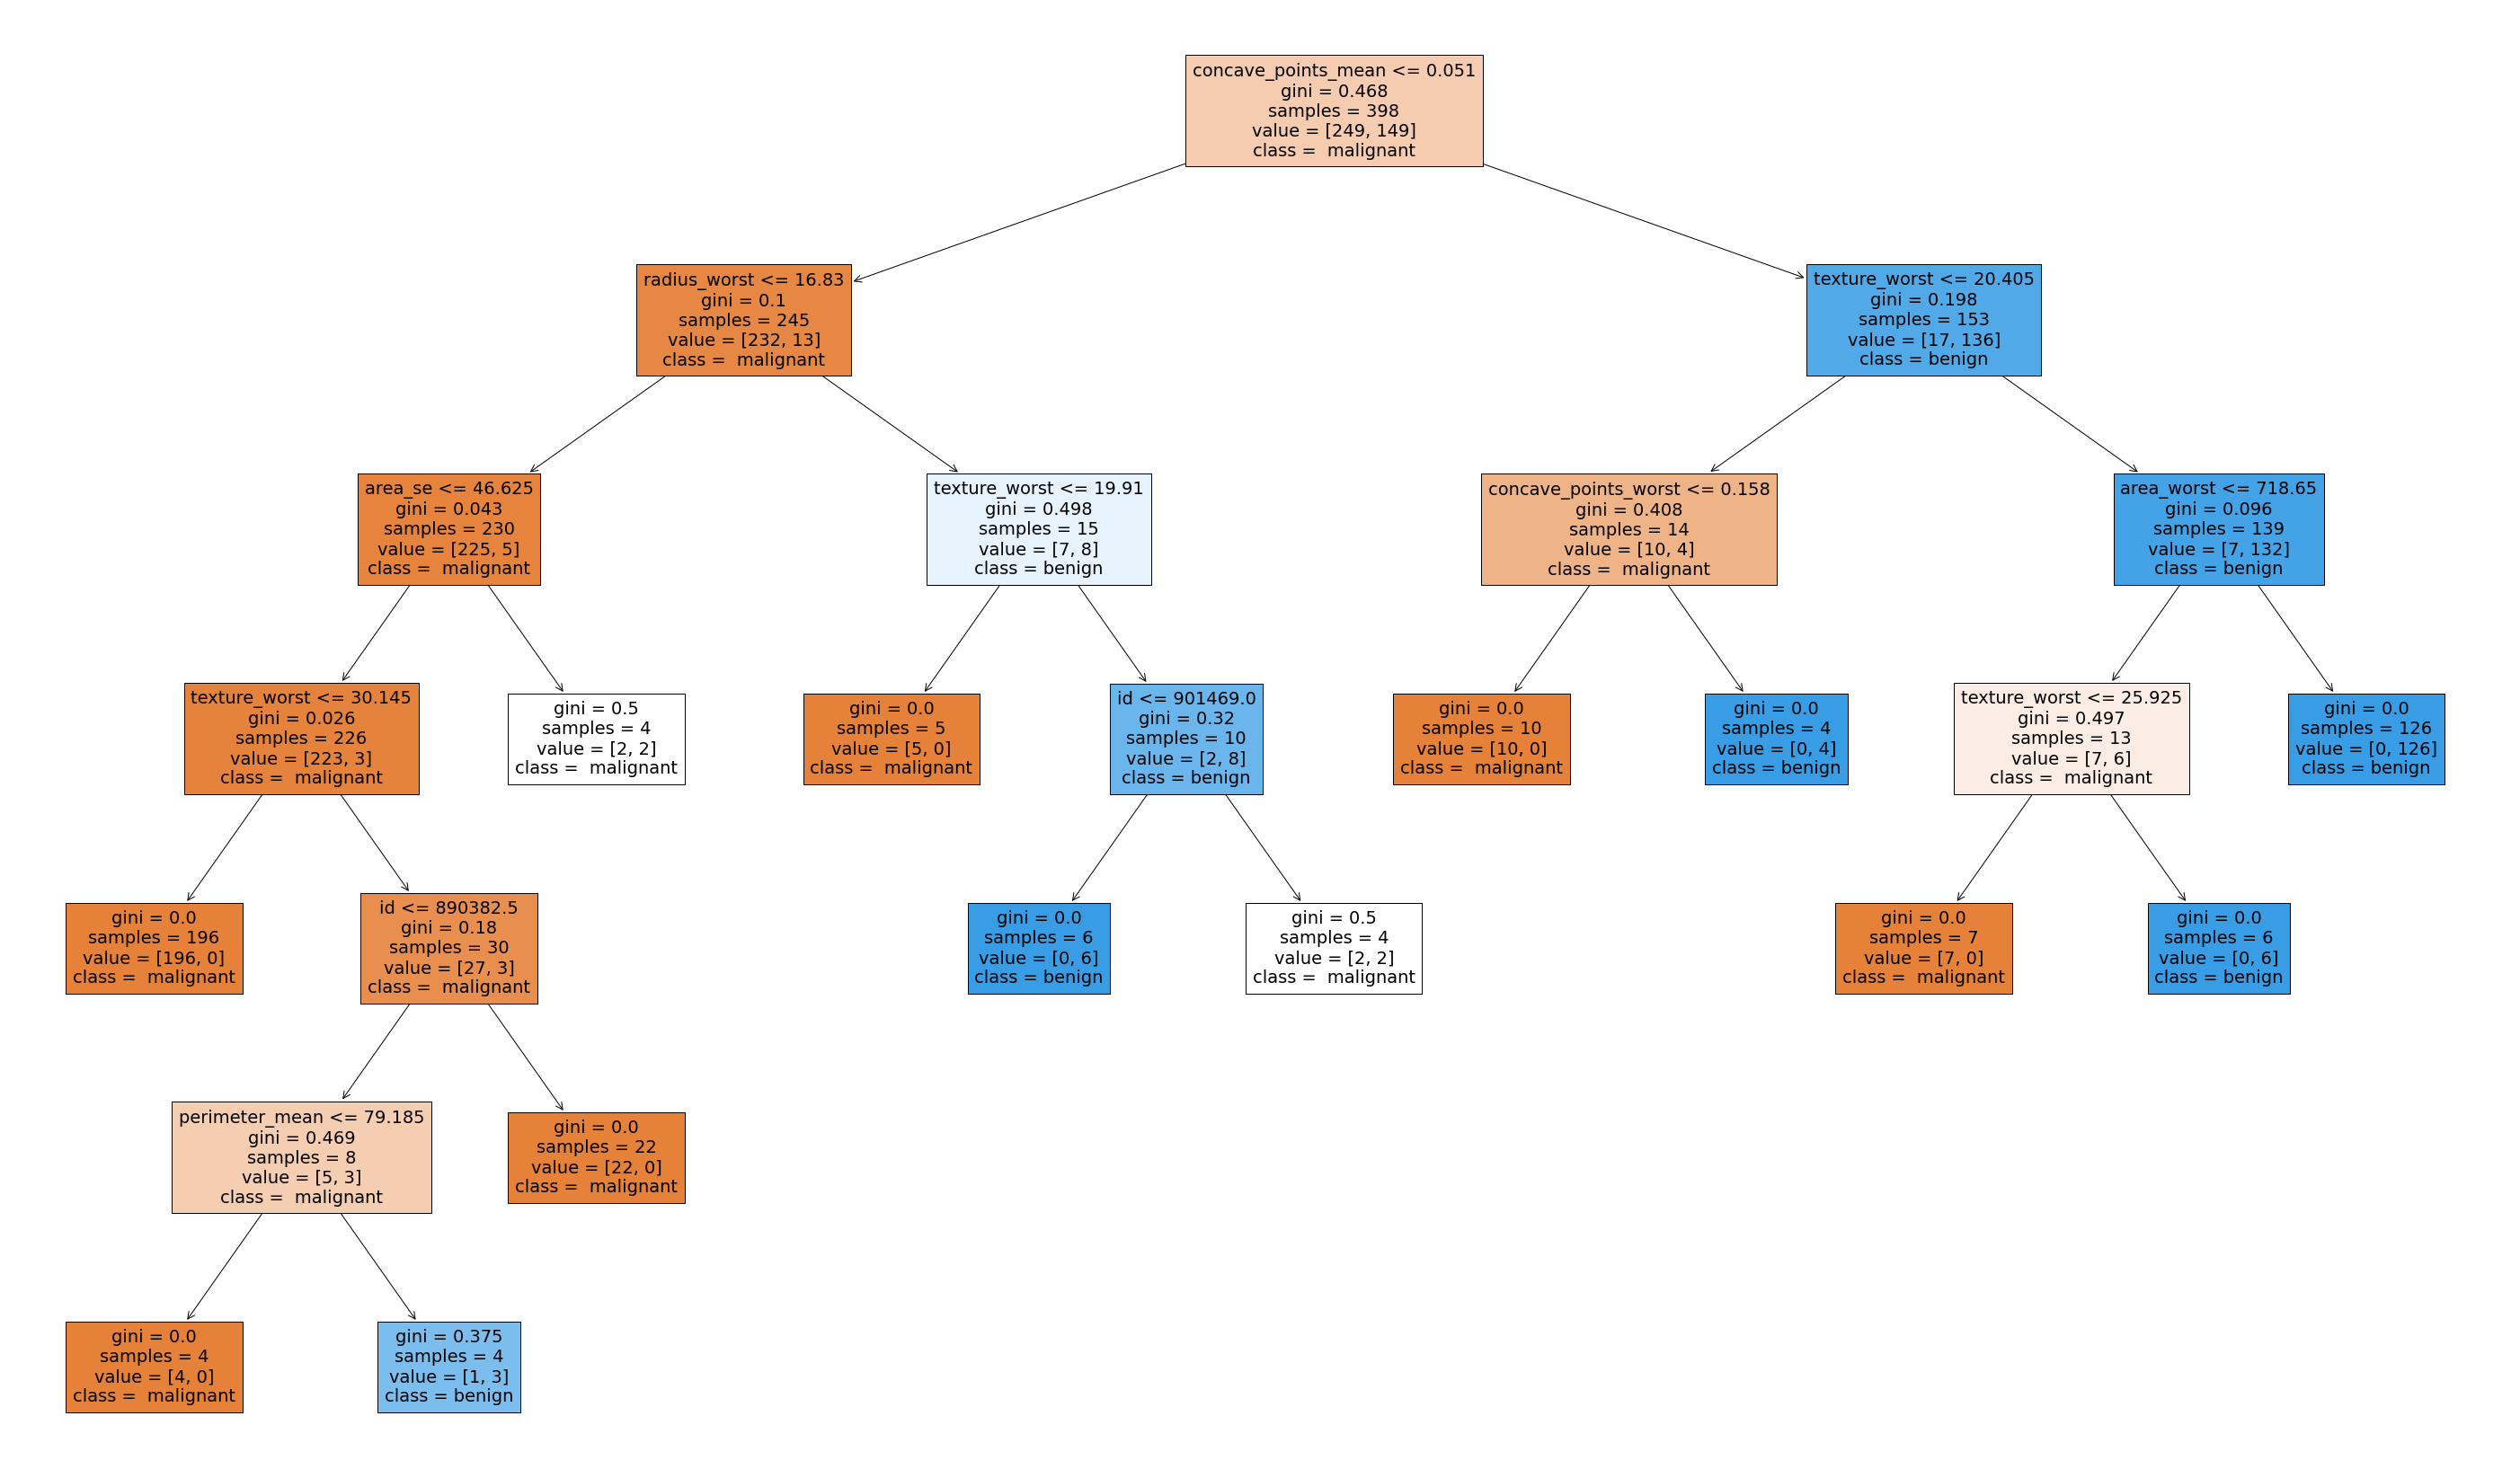

In [ ]:
# Import plot_tree from sklearn.tree module.
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (50, 30))

# Plot our tree.
plot_tree(grid.best_estimator_,
          feature_names = X_train.columns,
          class_names = [' malignant','benign'],
          filled = True);

In [ ]:
# Import export_text from sklearn.tree module.
from sklearn.tree import export_text

# Print out tree in plaintext.
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42,max_depth=3)
model = dt.fit(X, y)
text_representation =tree.export_text(dt)
print(text_representation)

|--- feature_21 <= 16.80
|   |--- feature_28 <= 0.14
|   |   |--- feature_14 <= 91.56
|   |   |   |--- class: B
|   |   |--- feature_14 >  91.56
|   |   |   |--- class: M
|   |--- feature_28 >  0.14
|   |   |--- feature_22 <= 25.67
|   |   |   |--- class: B
|   |   |--- feature_22 >  25.67
|   |   |   |--- class: M
|--- feature_21 >  16.80
|   |--- feature_22 <= 19.91
|   |   |--- feature_17 <= 0.03
|   |   |   |--- class: B
|   |   |--- feature_17 >  0.03
|   |   |   |--- class: M
|   |--- feature_22 >  19.91
|   |   |--- feature_25 <= 0.09
|   |   |   |--- class: B
|   |   |--- feature_25 >  0.09
|   |   |   |--- class: M

